In [1]:
import sys
import os
import pandas
import numpy as np 
import io 
from rdkit import Chem
sys.path.append("../")
import mol_cv
import load_medchem_data
import predict_medchem
from cv_plot import align_and_plot
import PIL
from collections import Counter

In [2]:
predictor_dict =  { k:v() for k,v in predict_medchem.all_predictors().items()}
fda = load_medchem_data.load_fda_drugs()
mols = fda["mol"]
fda["cluster"] = predict_medchem.cluster(mols=mols,
                                         fingerprint_size=1024, cutoff=0.5)
counter = Counter(fda["cluster"])
fda["cluster_size"] = fda["cluster"].map(counter)
cluster_1 = fda.loc[fda["cluster"] == 2,"mol"]

Getting distances: 100%|██████████████████████████████████████████████████████████| 1613/1613 [00:00<00:00, 4534.84it/s]


In [3]:
%%capture
images = align_and_plot(list(cluster_1),predictor_dict=predictor_dict,w_pad=-5,duration=500,
                        image_height=360,image_width=900,figsize=(7, 3),
                        save_gif='animated_plot.gif')

(np.float64(-0.5), np.float64(689.5), np.float64(163.5), np.float64(-0.5))

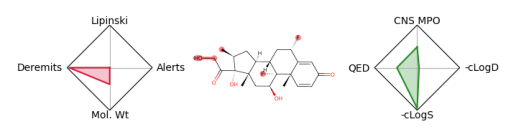

In [8]:
from matplotlib import pyplot as plt 
plt.imshow(images[0])
plt.axis("off")